![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

## Instructions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

### 1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv("files_for_lab/customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [3]:
print(data["Churn"].value_counts())
print(data["tenure"].value_counts())
print(data["SeniorCitizen"].value_counts())
print(data["MonthlyCharges"].value_counts())
print(data.isna().sum())

No     5174
Yes    1869
Name: Churn, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 3. Extract the target variable.

In [4]:
y = data["Churn"]

### 4. Extract the independent variables and scale them.

In [5]:
x = data[["tenure", "SeniorCitizen", "MonthlyCharges"]]
x

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 22)

<AxesSubplot:>

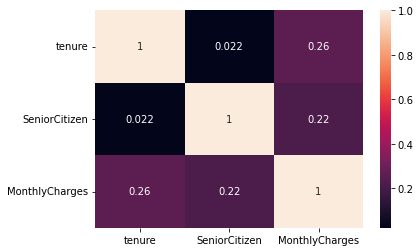

In [7]:
sns.heatmap(x_train.corr(), annot = True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

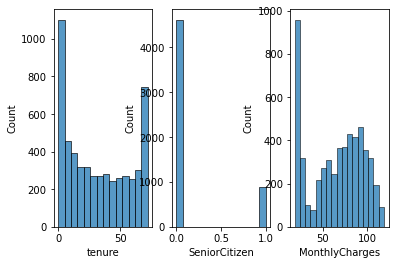

In [8]:
fig, axs = plt.subplots(1,3)
sns.histplot(x_train["tenure"], ax= axs[0])
sns.histplot(x_train["SeniorCitizen"], ax= axs[1])
sns.histplot(x_train["MonthlyCharges"], ax= axs[2])

In [9]:
sc = StandardScaler().fit(x_train)
x_train_sc = sc.transform(x_train)
x_train_sc = pd.DataFrame(x_train_sc, index = x_train.index, columns = x_train.columns)
x_train_sc

,tenure,SeniorCitizen,MonthlyCharges
190,0.438392,-0.436767,0.242386
6326,1.209058,-0.436767,-0.702764
2920,1.614672,-0.436767,0.683233
806,-0.575642,-0.436767,-0.315353
4085,-0.088906,-0.436767,-0.811306
...,...,...,...
5478,0.803445,-0.436767,1.391261
356,-0.656765,2.289551,-0.352090
4908,-0.170028,2.289551,1.386252
6276,-0.697326,-0.436767,-1.479257


In [10]:
x_test_sc = sc.transform(x_test)
x_test_sc = pd.DataFrame(x_test_sc, index = x_test.index, columns = x_test.columns)
x_test_sc

,tenure,SeniorCitizen,MonthlyCharges
6187,-0.981256,-0.436767,-1.485936
6448,1.046813,-0.436767,1.336155
5492,1.330743,-0.436767,-1.313939
2028,-0.697326,-0.436767,-1.504305
5376,-0.575642,-0.436767,-1.365705
...,...,...,...
1750,0.722322,-0.436767,0.836862
3217,-1.224624,-0.436767,-1.475917
2479,0.965690,-0.436767,0.374306
191,-1.062379,-0.436767,0.880279


### 5. Build the logistic regression model.

In [11]:
lr1 = LogisticRegression(random_state = 22, solver = "lbfgs", multi_class = "ovr").fit(x_train_sc, y_train)
y_train_pred1 = lr1.predict(x_train_sc)
y_test_pred1 = lr1.predict(x_test_sc)

### 6. Evaluate the model.

In [12]:
print("The Accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred1)))
print("The Accuracy in the TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred1)))
print("The Precision in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred1, pos_label="No")))
print("The Precision in the TEST set is: {:.3f}".format(precision_score(y_test, y_test_pred1, pos_label="No")))
print("The Recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred1, pos_label="No")))
print("The Recall in the TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred1, pos_label="No")))
print("The F1 for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred1, pos_label="No")))
print("The F1 for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred1, pos_label="No")))
print("The Kappa for the TRAIN set is {:.2f}".format(cohen_kappa_score(y_train, y_train_pred1)))
print("The Kappa for the TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred1)))

The Accuracy in the TRAIN set is: 0.795
The Accuracy in the TEST set is: 0.779
The Precision in the TRAIN set is: 0.826
The Precision in the TEST set is: 0.807
The Recall in the TRAIN set is: 0.916
The Recall in the TEST set is: 0.909
The F1 for the TRAIN set is 0.87
The F1 for the TEST set is 0.86
The Kappa for the TRAIN set is 0.41
The Kappa for the TEST set is 0.39


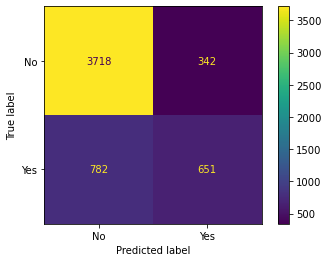

In [13]:
cm_train1 = confusion_matrix(y_train, y_train_pred1)
disp = ConfusionMatrixDisplay(cm_train1,display_labels=lr1.classes_);
disp.plot()

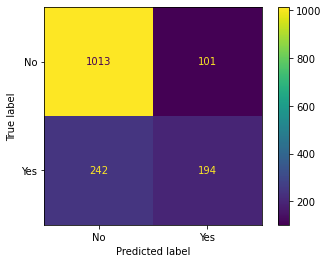

In [14]:
cm_test1 = confusion_matrix(y_test, y_test_pred1)
disp = ConfusionMatrixDisplay(cm_test1,display_labels=lr1.classes_);
disp.plot()

### 7. Even a simple model will give us more than 70% accuracy. Why?

Accuracy is more than 70% due to class imbalance, we have more than 70% of the data with a Churn of No, even if the model predicted a 100% of data to be No, we would still have more than 70% accuracy, but this is not what we want.

<AxesSubplot:xlabel='Churn', ylabel='Percent'>

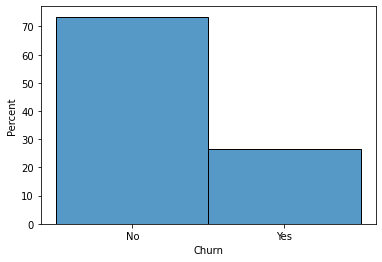

In [15]:
sns.histplot(data["Churn"], stat = "percent")

### 8. **Synthetic Minority Oversampling TEchnique (SMOTE)**

This is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [16]:
sm = SMOTE(random_state = 22, k_neighbors = 3)

x_train_sc_smote, y_train_smote = sm.fit_resample(x_train_sc, y_train)

In [17]:
lr2 = LogisticRegression(random_state = 22, solver = "lbfgs", multi_class = "ovr").fit(x_train_sc_smote, y_train_smote)

y_train_pred2 = lr2.predict(x_train_sc_smote)
y_test_pred2 = lr2.predict(x_test_sc)

In [18]:
print("The Accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train_smote, y_train_pred2)))
print("The Accuracy in the TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred2)))
print("The Precision in the TRAIN set is: {:.3f}".format(precision_score(y_train_smote, y_train_pred2, pos_label="No")))
print("The Precision in the TEST set is: {:.3f}".format(precision_score(y_test, y_test_pred2, pos_label="No")))
print("The Recall in the TRAIN set is: {:.3f}".format(recall_score(y_train_smote, y_train_pred2, pos_label="No")))
print("The Recall in the TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred2, pos_label="No")))
print("The F1 for the TRAIN set is {:.2f}".format(f1_score(y_train_smote,y_train_pred2, pos_label="No")))
print("The F1 for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred2, pos_label="No")))
print("The Kappa for the TRAIN set is {:.2f}".format(cohen_kappa_score(y_train_smote, y_train_pred2)))
print("The Kappa for the TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred2)))

The Accuracy in the TRAIN set is: 0.731
The Accuracy in the TEST set is: 0.735
The Precision in the TRAIN set is: 0.733
The Precision in the TEST set is: 0.870
The Recall in the TRAIN set is: 0.726
The Recall in the TEST set is: 0.742
The F1 for the TRAIN set is 0.73
The F1 for the TEST set is 0.80
The Kappa for the TRAIN set is 0.46
The Kappa for the TEST set is 0.41


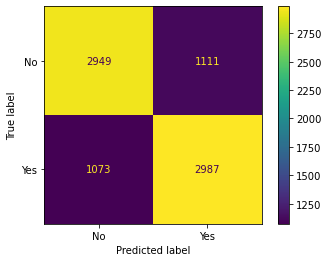

In [19]:
cm_train2 = confusion_matrix(y_train_smote, y_train_pred2)
disp = ConfusionMatrixDisplay(cm_train2,display_labels=lr2.classes_);
disp.plot()

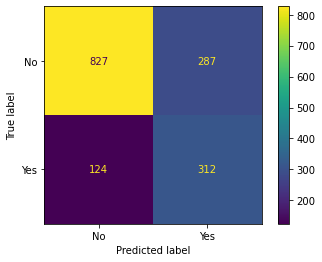

In [20]:
cm_test2 = confusion_matrix(y_test, y_test_pred2)
disp = ConfusionMatrixDisplay(cm_test2,display_labels=lr2.classes_);
disp.plot()

### Conclusion

In [21]:
print("The Accuracy in the FIRST TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred1)))
print("The Accuracy in the SECOND TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred2)))
print("The Precision in the FIRST TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred1, pos_label="No")))
print("The Precision in the SECOND TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred2, pos_label="No")))
print("The Recall in the FIRST TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred1, pos_label="No")))
print("The Recall in the SECOND TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred2, pos_label="No")))
print("The F1 for the FIRST TEST set is {:.2f}".format(f1_score(y_test,y_test_pred1, pos_label="No")))
print("The F1 for the SECOND TEST set is {:.2f}".format(f1_score(y_test,y_test_pred2, pos_label="No")))
print("The Kappa for the FIRST TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred1)))
print("The Kappa for the SECOND TEST set is {:.2f}".format(cohen_kappa_score(y_test, y_test_pred2)))

The Accuracy in the FIRST TEST set is: 0.779
The Accuracy in the SECOND TEST set is: 0.735
The Precision in the FIRST TEST  set is: 0.807
The Precision in the SECOND TEST  set is: 0.870
The Recall in the FIRST TEST set is: 0.909
The Recall in the SECOND TEST set is: 0.742
The F1 for the FIRST TEST set is 0.86
The F1 for the SECOND TEST set is 0.80
The Kappa for the FIRST TEST set is 0.39
The Kappa for the SECOND TEST set is 0.41


There is a slight improvement for the Precision and the Kappa Score at the cost of worsening the rest of the metrics, specially the Recall Score (-0.16).